# Spaceship Titanic

> *Source:* Addison Howard, Ashley Chow, Ryan Holbrook. (2022). Spaceship Titanic. <br/>
> *kaggle:* ***https://kaggle.com/competitions/spaceship-titanic***

---
#### Contents:
- Exploratory Data Analysis
- Feature Engineering
- Data Cleaning
- Encoding, Scaling and Preprocessing
- Training Machine Learning Models
- Cross Validation and Ensembling Predictions

In [1]:
import os
os.getcwd()
# os.chdir(default_path)
import zipfile 
with zipfile.ZipFile("spaceship-titanic.zip", 'r') as file:
    file.extractall('space_ship')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ParameterGrid, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold, StratifiedKFold
from iterstrat.ml_stratifiers import RepeatedMultilabelStratifiedKFold
from sklearn.feature_selection import RFECV, VarianceThreshold, SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelBinarizer, label_binarize
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as Pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from summarytools import dfSummary
from sklearn.metrics import roc_auc_score, RocCurveDisplay, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
train_df = pd.read_csv("space_ship\\train.csv")
test_df = pd.read_csv("space_ship\\test.csv")
sample=pd.read_csv('space_ship\\sample_submission.csv')

In [6]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


---
#### *Feature description*:
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are - confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [8]:
print('Train set shape:', train_df.shape)
print('Test set shape:', test_df.shape)

Train set shape: (8693, 14)
Test set shape: (4277, 13)


In [9]:
print('Train dataset missing values:')
print(train_df.isna().sum())
print('-------------------------------')
print('Test dataset missing values:')
print(test_df.isna().sum())

Train dataset missing values:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
-------------------------------
Test dataset missing values:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [10]:
print(f'Number of duplicates in train dataset: {train_df.duplicated().sum()}, ({np.round(100*train_df.duplicated().sum()/len(train_df),1)}%)')
print(f'Number of duplicates in test dataset: {test_df.duplicated().sum()}, ({np.round(100*test_df.duplicated().sum()/len(test_df),1)}%)')

Number of duplicates in train dataset: 0, (0.0%)
Number of duplicates in test dataset: 0, (0.0%)


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


### Feature Engineering

In [14]:
def process_passenger_data(df):
    # Step 1: Split 'PassengerId' into 'Passenger_group' and 'Passenger_num_in_group'
    df[["Passenger_group", "Passenger_num_in_group"]] = df["PassengerId"].str.split("_", expand=True)
    
    # Step 2: Remove leading zeros from 'Passenger_num_in_group'
    df["Passenger_num_in_group"] = df["Passenger_num_in_group"].str.lstrip('0')
    
    # Step 3: Drop the original 'PassengerId' column
    df.drop(columns=["PassengerId"], inplace=True)
    
    # Step 4: Split 'Cabin' into 'Cabin_deck', 'Cabin_number', and 'Cabin_side'
    df[["Cabin_deck", "Cabin_number", "Cabin_side"]] = df["Cabin"].str.split("/", expand=True)
    
    # Step 5: Convert 'Cabin_side' from 'P' to 'Port' and 'S' to 'Starboard'
    df['Cabin_side'] = np.where(df['Cabin_side'] == 'P', 'Port', 'Starboard')
    
    # Step 6: Drop the original 'Cabin' column
    df.drop(columns=["Cabin"], inplace=True)

    df['TotalSpend'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']
    return df

In [15]:
train_df=process_passenger_data(train_df)

In [16]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_group,Passenger_num_in_group,Cabin_deck,Cabin_number,Cabin_side,TotalSpend
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,B,0,Port,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,F,0,Starboard,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,1,A,0,Starboard,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,A,0,Starboard,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,F,1,Starboard,1091.0


In [17]:
test_df = process_passenger_data(test_df)
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Passenger_group,Passenger_num_in_group,Cabin_deck,Cabin_number,Cabin_side,TotalSpend
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,1,G,3,Starboard,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,1,F,4,Starboard,2832.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,1,C,0,Starboard,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,1,C,1,Starboard,7418.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,1,F,5,Starboard,645.0


### Exploratory Data Analysis

In [19]:
transported_counts = train_df['Transported'].value_counts()

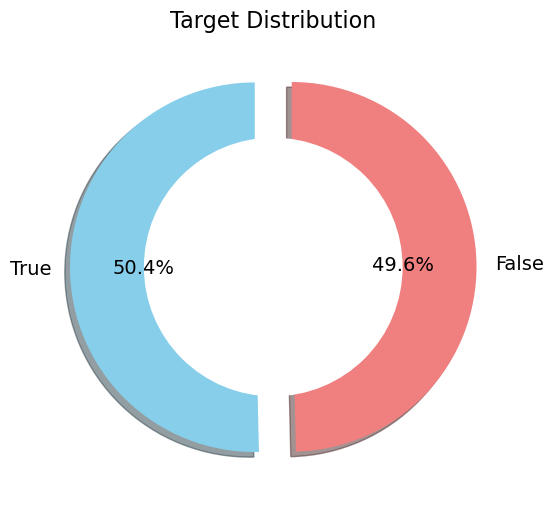

In [20]:
# Figure size
plt.figure(figsize=(6,6))

# Create a donut chart
plt.pie(train_df['Transported'].value_counts(), labels=transported_counts.index, explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={'fontsize': 14}, colors=['skyblue', 'lightcoral'])

# Add a circle to create the 'donut' effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Target Distribution", fontsize=16)
plt.gca().set_aspect('equal')  
plt.show()

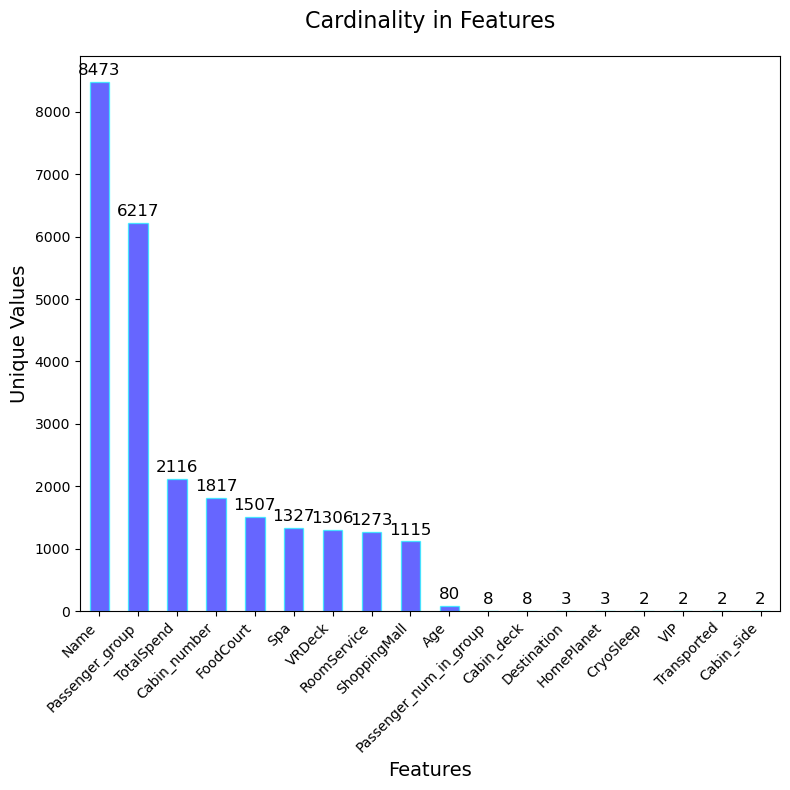

In [21]:
sorted_cardinality = train_df.nunique().sort_values(ascending=False)

# Figure size
plt.figure(figsize=(8,8))

# Plotting the cardinality with enhanced visuals
ax = sorted_cardinality.plot.bar(
    color='blue', 
    edgecolor='cyan', 
    title="Cardinality in Features", 
    alpha=0.6
)

ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Unique Values", fontsize=14)
ax.set_title("Cardinality in Features", fontsize=16, pad=20)

# Adding data labels above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

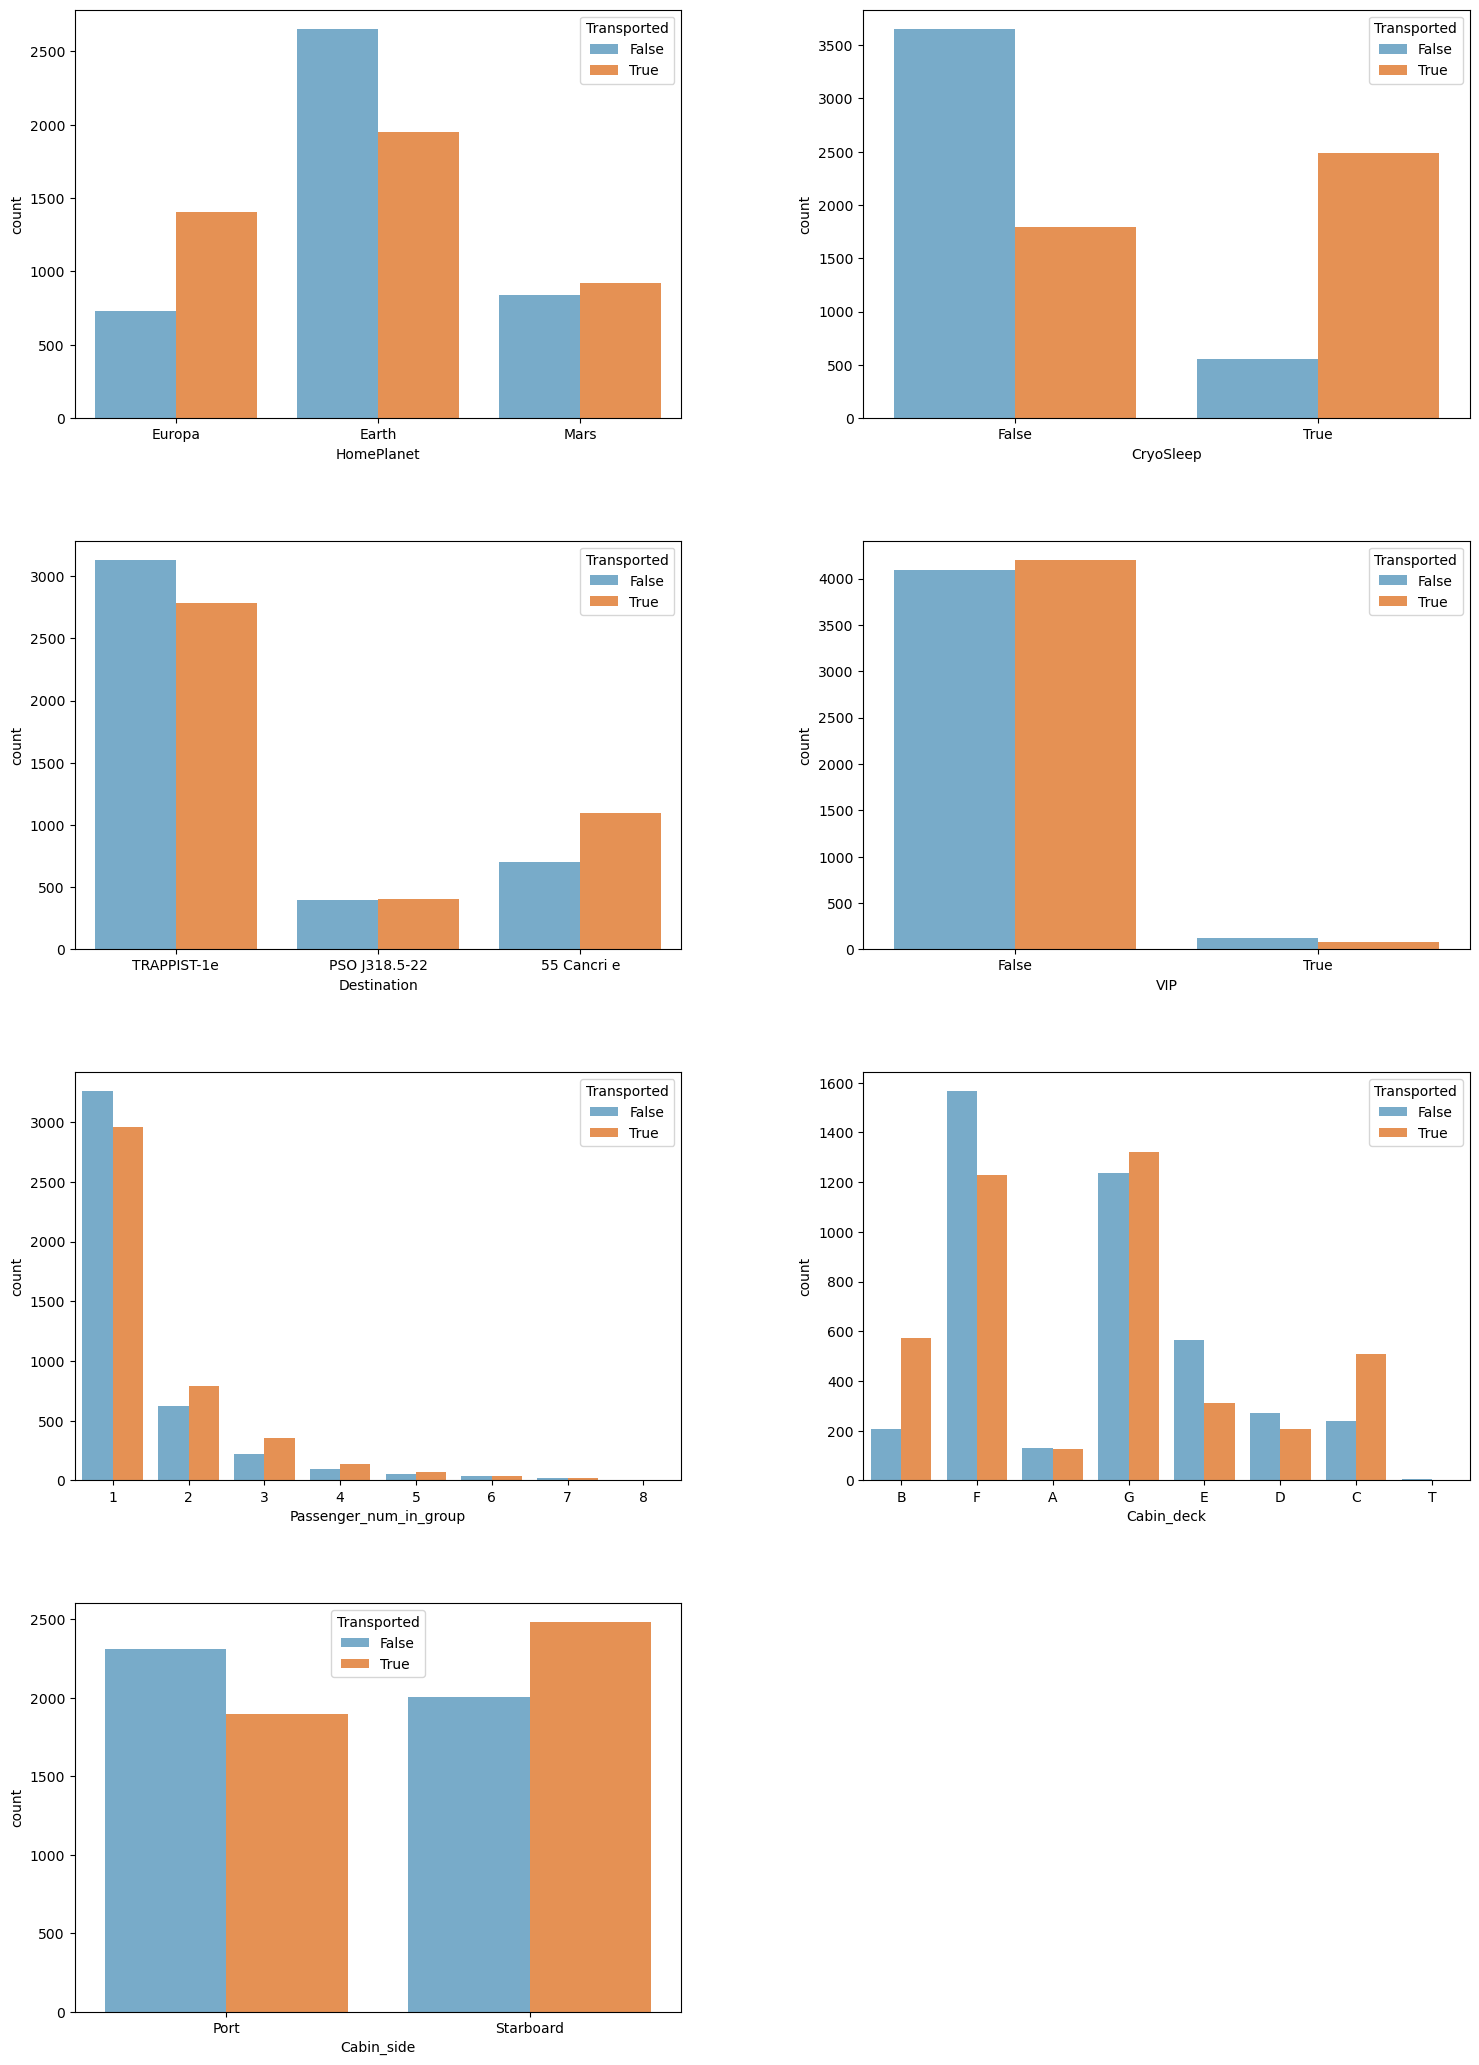

In [22]:
# Categorical features
cat_feats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Passenger_num_in_group', 'Cabin_deck', 'Cabin_side']

# Create a figure for subplots
fig = plt.figure(figsize=(18, 26))  # Increased the figure size for better readability

# Define custom color palette
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom colors for different categories

# Plot categorical features with vertical bars
for i, var_name in enumerate(cat_feats):
    ax = fig.add_subplot(4, 2, i+1)  # 4 rows, 2 columns, and the subplot position
    sns.countplot(
        data=train_df, x=var_name, hue='Transported', ax=ax, 
        palette=['#6baed6', '#fd8d3c']  # Colors for True/False in Transported
    )

# Add extra space between plots
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust vertical and horizontal space between plots

# Display the plot
plt.show()

In [23]:
train_df.pivot_table(index='HomePlanet', columns='CryoSleep', values='Transported')

CryoSleep,False,True
HomePlanet,,
Earth,0.320992,0.656295
Europa,0.400172,0.989023
Mars,0.276982,0.911809


***Proportion of Transported for Each Category:***

For each HomePlanet, the values indicate the proportion of people who were transported (Transported=True) given the CryoSleep status.
<br/>
- Earth:
    - CryoSleep=False: 32.1% of people were transported.
    - CryoSleep=True: 65.6% of people were transported.
<br/>
- Europa:
    - CryoSleep=False: 40.0% of people were transported.
    - CryoSleep=True: 98.9% of people were transported.
<br/>
- Mars:
    - CryoSleep=False: 27.7% of people were transported.
    - CryoSleep=True: 91.2% of people were transported.
 
**General Insight:**

CryoSleep seems to have a significant positive effect on the likelihood of being transported for individuals from all HomePlanet categories, with the proportion of transported individuals generally higher for those with CryoSleep=True.

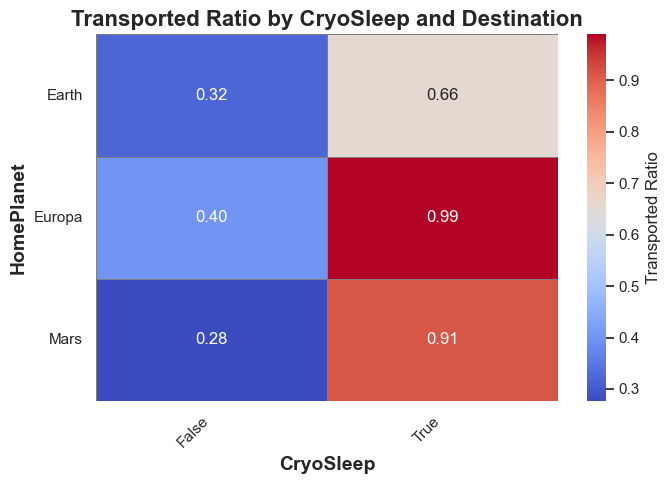

In [25]:
sns.set(style='whitegrid', context='notebook')
pivot_table = train_df.pivot_table(index='HomePlanet', columns='CryoSleep', values='Transported')

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

heatmap = sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",  # Format for annotations
    cmap="coolwarm",  # A color map with a good contrast
    linewidths=0.5,  # Line width between cells
    linecolor='gray',  # Color of the lines
    cbar_kws={'label': 'Transported Ratio'},  # Label for color bar
)

# Improve the appearance of the plot
heatmap.set_title('Transported Ratio by CryoSleep and Destination', weight='bold', size=16)
heatmap.set_xlabel('CryoSleep', weight='bold', size=14)
heatmap.set_ylabel('HomePlanet', weight='bold', size=14)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
train_df.pivot_table(index='CryoSleep', columns='Destination', values='Transported')

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
CryoSleep,,,
False,0.380531,0.327411,0.315290
True,0.928281,0.689295,0.797001


**Proportion of Transported for Each Category:**

For each Destination, the values indicate the proportion of people who were transported (Transported=True) given the CryoSleep status.
<br/>
- 55 Cancri e:
    - CryoSleep=False: 38.1% of people were transported.
    - CryoSleep=True: 92.8% of people were transported.
<br/>
- PSO J318.5-22:
    - CryoSleep=False: 32.7% of people were transported.
    - CryoSleep=True: 68.9% of people were transported.
<br/>
- TRAPPIST-1e:
    - CryoSleep=False: 31.5% of people were transported.
    - CryoSleep=True: 79.7% of people were transported.
 
**General Insight:**

CryoSleep seems to have a strong positive effect on the likelihood of being transported across all Destinations, but the effect is most pronounced for those heading to 55 Cancri e, followed by TRAPPIST-1e and PSO J318.5-22.

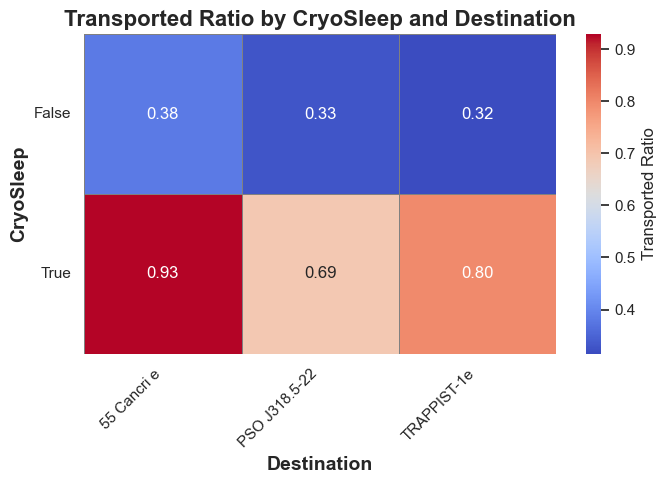

In [28]:
sns.set(style='whitegrid', context='notebook')
pivot_table = train_df.pivot_table(index='CryoSleep', columns='Destination', values='Transported')

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

heatmap = sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",  # Format for annotations
    cmap="coolwarm",  # A color map with a good contrast
    linewidths=0.5,  # Line width between cells
    linecolor='gray',  # Color of the lines
    cbar_kws={'label': 'Transported Ratio'},  # Label for color bar
)

# Improve the appearance of the plot
heatmap.set_title('Transported Ratio by CryoSleep and Destination', weight='bold', size=16)
heatmap.set_xlabel('Destination', weight='bold', size=14)
heatmap.set_ylabel('CryoSleep', weight='bold', size=14)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
bins = [0, 2, 11, 17, 25, 44, 54, 64, float('inf')]
labels = ['[0-2] Infants/Toddlers', '[3-11] Children', '[12-17] Teenagers', '[18-25] Young Adults', '[26-44] Adults', '[45-54] Middle-Aged Adults', 
          '[54-64] Seniors', '[65+] Elderly']

# Create a new column 'Age_Group' based on bins
train_df['Age_Group'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)
train_df['Age_Group'].value_counts()

Age_Group
[26-44] Adults                3506
[18-25] Young Adults          2266
[45-54] Middle-Aged Adults     790
[12-17] Teenagers              669
[3-11] Children                473
[54-64] Seniors                429
[0-2] Infants/Toddlers         245
[65+] Elderly                  136
Name: count, dtype: int64

In [30]:
# Create a new column 'Age_Group' based on bins
test_df['Age_Group'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)
test_df['Age_Group'].value_counts()

Age_Group
[26-44] Adults                1697
[18-25] Young Adults          1204
[45-54] Middle-Aged Adults     396
[12-17] Teenagers              319
[3-11] Children                207
[54-64] Seniors                191
[0-2] Infants/Toddlers         109
[65+] Elderly                   63
Name: count, dtype: int64

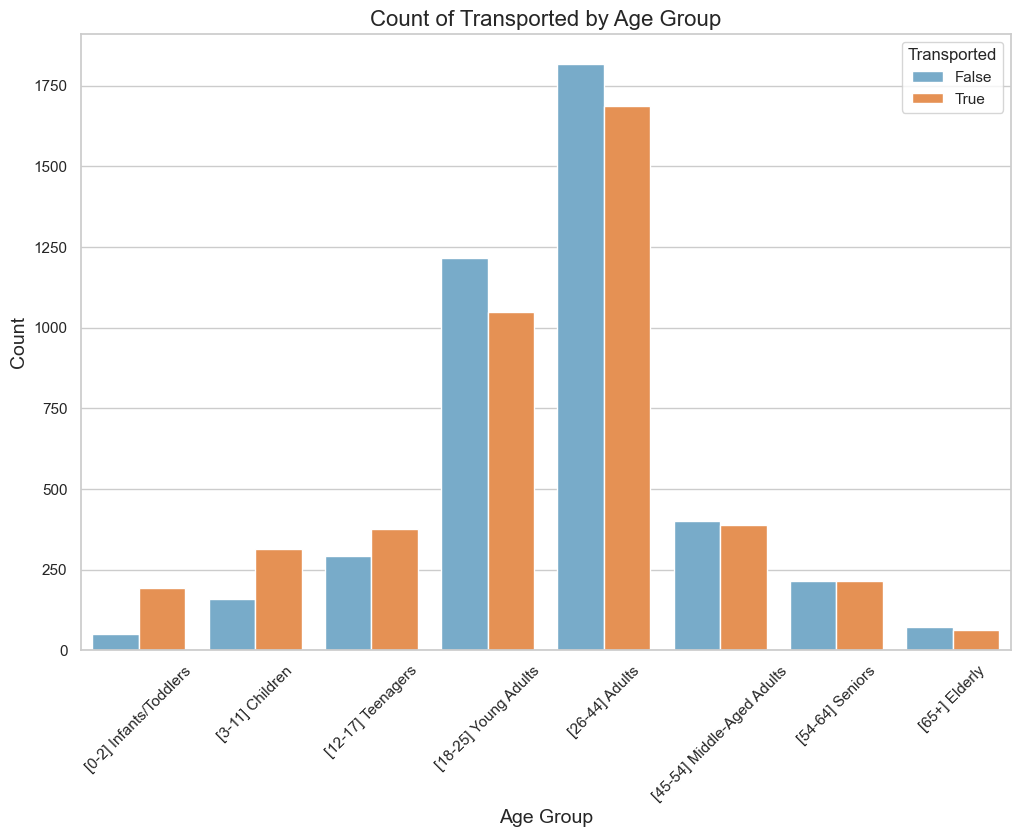

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

#Assuming you already have the 'Age_Group' column in your DataFrame
# Create a new DataFrame for plotting
age_transport_df = train_df.groupby(['Age_Group', 'Transported']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 8))

# Plot with seaborn
sns.barplot(data=age_transport_df, x='Age_Group', y='Count', hue='Transported', palette=['#6baed6', '#fd8d3c'])

# Add labels and title
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Transported by Age Group', fontsize=16)
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.legend(title='Transported', loc='upper right')

# Show plot
plt.show()

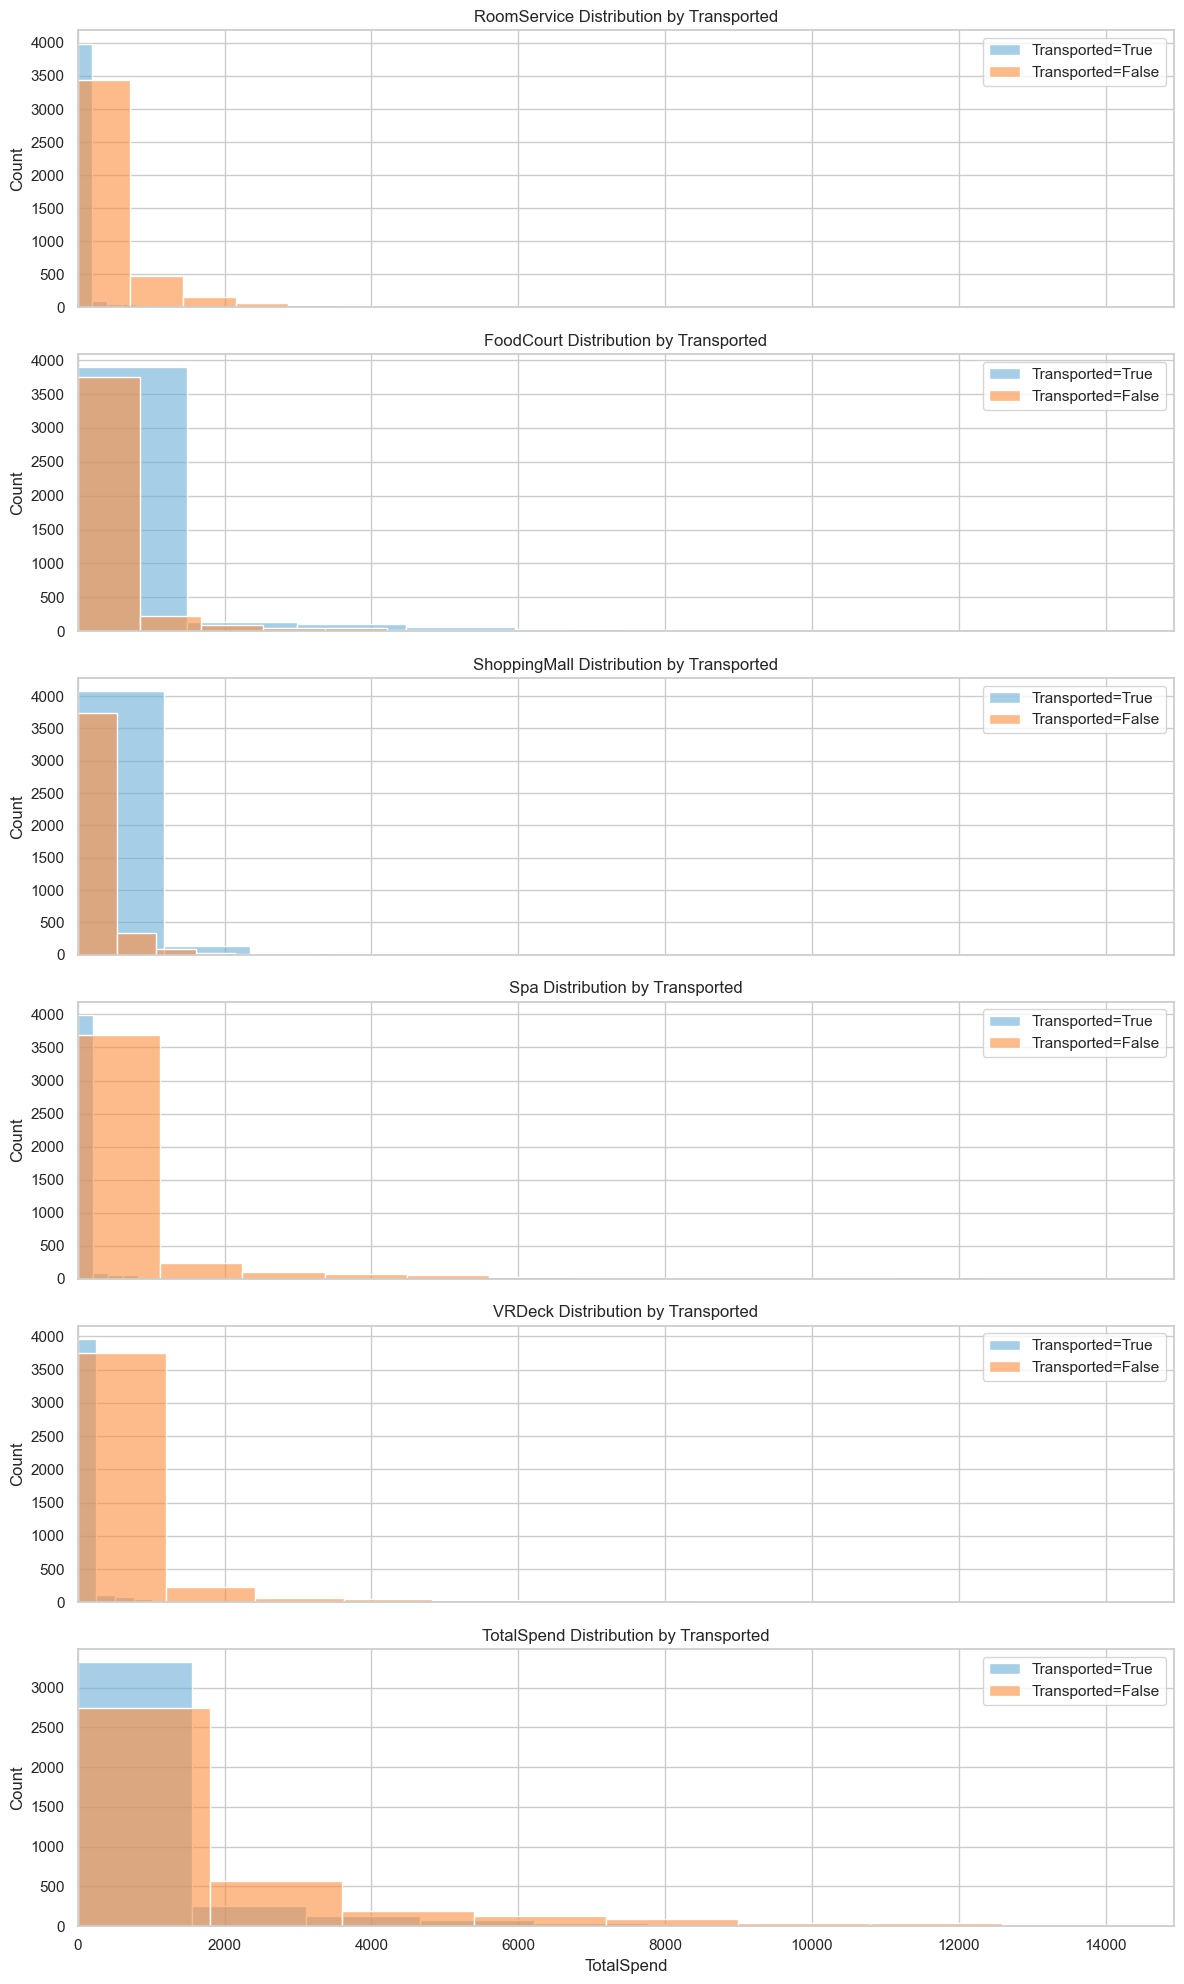

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to analyze
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ,'TotalSpend']

# Create subplots
fig, axs = plt.subplots(len(features), 1, figsize=(12, 20), sharex=True)

for i, feature in enumerate(features):
    # Define the x-axis range based on the feature's distribution
    x_min = train_df[feature].min()
    x_max = train_df[feature].quantile(0.99)  # 99th percentile to avoid extreme outliers
    
    # Plot histograms for True and False categories separately with adjusted bin width and transparency
    sns.histplot(data=train_df[train_df['Transported'] == True], x=feature, bins=20, color='#6baed6', label='Transported=True', ax=axs[i], alpha=0.6, kde=False)
    sns.histplot(data=train_df[train_df['Transported'] == False], x=feature, bins=20, color='#fd8d3c', label='Transported=False', ax=axs[i], alpha=0.6, kde=False)
    
    axs[i].set_title(f'{feature} Distribution by Transported')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')
    axs[i].legend()
    
    # Set x-axis limits
    axs[i].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

## Handling Missing data

Handling missing values is a crucial part of data preprocessing, and the approach depends on the nature of the feature (numeric or categorical).

Drop misisng cases

In [83]:
train = train_df.copy()
train = train.dropna()
# Verify that missing values are handled
print(train.isnull().sum())

HomePlanet                0
CryoSleep                 0
Destination               0
Age                       0
VIP                       0
RoomService               0
FoodCourt                 0
ShoppingMall              0
Spa                       0
VRDeck                    0
Name                      0
Transported               0
Passenger_group           0
Passenger_num_in_group    0
Cabin_deck                0
Cabin_number              0
Cabin_side                0
TotalSpend                0
Age_Group                 0
dtype: int64


In [85]:
test = test_df.copy()
# test = test.dropna()
print(test.isnull().sum())

HomePlanet                 87
CryoSleep                  93
Destination                92
Age                        91
VIP                        93
RoomService                82
FoodCourt                 106
ShoppingMall               98
Spa                       101
VRDeck                     80
Name                       94
Passenger_group             0
Passenger_num_in_group      0
Cabin_deck                100
Cabin_number              100
Cabin_side                  0
TotalSpend                455
Age_Group                  91
dtype: int64


In [87]:
# drop Age, Name, Passenger_group, Cabin_number
train = train.drop(columns=['Name'])
train['Ever_Spend'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

In [89]:
test = test_df.drop(columns=['Name'])
test['Ever_Spend'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

In [91]:
train['CryoSleep'] = train['CryoSleep'].astype(int)
train['VIP'] = train['VIP'].astype(int)

In [ ]:
test['CryoSleep'] = test['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)

In [95]:
columns_to_group = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend']
grouped_sum = train.groupby('Passenger_group')[columns_to_group].sum().reset_index()
grouped_mean = train.groupby('Passenger_group')[columns_to_group].mean().reset_index()

# Rename the columns for clarity
grouped_sum.columns = ['Passenger_group'] + [f'{col}_sum' for col in columns_to_group]
grouped_mean.columns = ['Passenger_group'] + [f'{col}_mean' for col in columns_to_group]

# Merge the sum and mean DataFrames
train = pd.merge(train, grouped_mean, on='Passenger_group').merge(grouped_sum, on='Passenger_group')

In [97]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,ShoppingMall_mean,Spa_mean,VRDeck_mean,TotalSpend_mean,RoomService_sum,FoodCourt_sum,ShoppingMall_sum,Spa_sum,VRDeck_sum,TotalSpend_sum
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,...,25.0,549.0,44.0,736.0,109.0,9.0,25.0,549.0,44.0,736.0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,185.5,5022.0,121.0,7779.5,43.0,4859.0,371.0,10044.0,242.0,15559.0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,185.5,5022.0,121.0,7779.5,43.0,4859.0,371.0,10044.0,242.0,15559.0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,...,151.0,565.0,2.0,1091.0,303.0,70.0,151.0,565.0,2.0,1091.0


In [77]:
columns_to_group = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend']
grouped_sum_test = test.groupby('Passenger_group')[columns_to_group].sum().reset_index()
grouped_mean_test = test.groupby('Passenger_group')[columns_to_group].mean().reset_index()

# Rename the columns for clarity
grouped_sum_test.columns = ['Passenger_group'] + [f'{col}_sum' for col in columns_to_group]
grouped_mean_test.columns = ['Passenger_group'] + [f'{col}_mean' for col in columns_to_group]

# Merge the sum and mean DataFrames
test = pd.merge(test, grouped_mean_test, on='Passenger_group').merge(grouped_sum_test, on='Passenger_group')

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3281 entries, 0 to 3280
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   HomePlanet              3281 non-null   object  
 1   CryoSleep               3281 non-null   int32   
 2   Destination             3281 non-null   object  
 3   Age                     3281 non-null   float64 
 4   VIP                     3281 non-null   int32   
 5   RoomService             3281 non-null   float64 
 6   FoodCourt               3281 non-null   float64 
 7   ShoppingMall            3281 non-null   float64 
 8   Spa                     3281 non-null   float64 
 9   VRDeck                  3281 non-null   float64 
 10  Name                    3281 non-null   object  
 11  Passenger_group         3281 non-null   object  
 12  Passenger_num_in_group  3281 non-null   object  
 13  Cabin_deck              3281 non-null   object  
 14  Cabin_number            

In [240]:
# Separate features and target
X = train.drop(columns=['Transported'])
y = train['Transported']

X['Passenger_num_in_group'] = X['Passenger_num_in_group'].astype(int)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side','Age_Group'])
bool_columns = X_encoded.select_dtypes(include='bool').columns
X_encoded[bool_columns] = X_encoded[bool_columns].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display shapes to confirm split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5284, 49) (1322, 49) (5284,) (1322,)


In [226]:
test['Passenger_num_in_group'] = test['Passenger_num_in_group'].astype(int)

# One-hot encode categorical features
test_encoded = pd.get_dummies(test, columns=['HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side','Age_Group'])
bool_columns = test_encoded.select_dtypes(include='bool').columns
test_encoded[bool_columns] = test_encoded[bool_columns].astype(int)

In [228]:
test_encoded.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passenger_group,Passenger_num_in_group,Cabin_number,TotalSpend,Ever_Spend,RoomService_mean,FoodCourt_mean,ShoppingMall_mean,Spa_mean,VRDeck_mean,TotalSpend_mean,RoomService_sum,FoodCourt_sum,ShoppingMall_sum,Spa_sum,VRDeck_sum,TotalSpend_sum,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_Port,Cabin_side_Starboard,Age_Group_[0-2] Infants/Toddlers,Age_Group_[3-11] Children,Age_Group_[12-17] Teenagers,Age_Group_[18-25] Young Adults,Age_Group_[26-44] Adults,Age_Group_[45-54] Middle-Aged Adults,Age_Group_[54-64] Seniors,Age_Group_[65+] Elderly
0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,1,3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,1,4,2832.0,1,0.0,9.0,0.0,2823.0,0.0,2832.0,0.0,9.0,0.0,2823.0,0.0,2832.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2,True,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,1,1,7418.0,1,0.0,6652.0,0.0,181.0,585.0,7418.0,0.0,6652.0,0.0,181.0,585.0,7418.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,False,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,1,5,645.0,1,10.0,0.0,635.0,0.0,0.0,645.0,10.0,0.0,635.0,0.0,0.0,645.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [232]:
X_train.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Passenger_group', 'Passenger_num_in_group',
       'Cabin_number', 'TotalSpend', 'Ever_Spend', 'RoomService_mean',
       'FoodCourt_mean', 'ShoppingMall_mean', 'Spa_mean', 'VRDeck_mean',
       'TotalSpend_mean', 'RoomService_sum', 'FoodCourt_sum',
       'ShoppingMall_sum', 'Spa_sum', 'VRDeck_sum', 'TotalSpend_sum',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Cabin_deck_A', 'Cabin_deck_B',
       'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F',
       'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_Port',
       'Cabin_side_Starboard', 'Age_Group_[0-2] Infants/Toddlers',
       'Age_Group_[3-11] Children', 'Age_Group_[12-17] Teenagers',
       'Age_Group_[18-25] Young Adults', 'Age_Group_[26-44] Adults',
       'Age_Group_[45-54] Middle-Aged Adults', 'A

In [242]:
def sanitize_feature_names(feature_names):
    return [name.replace('[', '_').replace(']', '_').replace('<', '_').replace('>', '_') for name in feature_names]

sanitized_features = sanitize_feature_names([
    'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
    'VRDeck', 'Passenger_group', 'Passenger_num_in_group', 'Cabin_number', 
    'TotalSpend', 'Ever_Spend', 'RoomService_mean',
    'FoodCourt_mean', 'ShoppingMall_mean', 'Spa_mean', 'VRDeck_mean',
    'TotalSpend_mean', 'RoomService_sum', 'FoodCourt_sum',
    'ShoppingMall_sum', 'Spa_sum', 'VRDeck_sum', 'TotalSpend_sum', 
    'HomePlanet_Earth',
    'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
    'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_deck_A',
    'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
    'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_Port',
    'Cabin_side_Starboard', 'Age_Group_[0-2] Infants/Toddlers',
    'Age_Group_[3-11] Children', 'Age_Group_[12-17] Teenagers',
    'Age_Group_[18-25] Young Adults', 'Age_Group_[26-44] Adults',
    'Age_Group_[45-54] Middle-Aged Adults', 'Age_Group_[54-64] Seniors',
    'Age_Group_[65+] Elderly'
])

X_train.columns = sanitized_features
X_test.columns = sanitized_features

In [244]:
pd.options.display.max_columns=None
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passenger_group,Passenger_num_in_group,Cabin_number,TotalSpend,Ever_Spend,RoomService_mean,FoodCourt_mean,ShoppingMall_mean,Spa_mean,VRDeck_mean,TotalSpend_mean,RoomService_sum,FoodCourt_sum,ShoppingMall_sum,Spa_sum,VRDeck_sum,TotalSpend_sum,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_Port,Cabin_side_Starboard,Age_Group__0-2_ Infants/Toddlers,Age_Group__3-11_ Children,Age_Group__12-17_ Teenagers,Age_Group__18-25_ Young Adults,Age_Group__26-44_ Adults,Age_Group__45-54_ Middle-Aged Adults,Age_Group__54-64_ Seniors,Age_Group__65+_ Elderly
5936,0,25.0,0,0.0,1673.0,0.0,642.0,612.0,8363,1,101,2927.0,1,0.0,1181.5,0.5,836.0,1442.5,3460.5,0.0,2363.0,1.0,1672.0,2885.0,6921.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4416,0,36.0,0,0.0,2624.0,1657.0,2799.0,1.0,6181,1,191,7081.0,1,0.0,2624.0,1657.0,2799.0,1.0,7081.0,0.0,2624.0,1657.0,2799.0,1.0,7081.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2948,1,34.0,0,0.0,0.0,0.0,0.0,0.0,4194,1,862,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3085,1,37.0,0,0.0,0.0,0.0,0.0,0.0,4367,1,710,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
5819,1,22.0,0,0.0,0.0,0.0,0.0,0.0,8200,1,1330,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
test_encoded.columns = sanitized_features

### Modeling 

Tree model classifier
- XGBoost
- CatBoost
- LightGBM
- RandomForest Classifier
- Deep Learning tensorflow.Keras

In [111]:
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

In [112]:
def evaluate_model(y_true, y_pred, y_pred_proba, model_name="Model"):
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred_proba))

In [113]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Passenger_group,Passenger_num_in_group,Cabin_number,TotalSpend,Ever_Spend,RoomService_mean,FoodCourt_mean,ShoppingMall_mean,Spa_mean,VRDeck_mean,TotalSpend_mean,RoomService_sum,FoodCourt_sum,ShoppingMall_sum,Spa_sum,VRDeck_sum,TotalSpend_sum,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_Port,Cabin_side_Starboard,Age_Group__0-2_ Infants/Toddlers,Age_Group__3-11_ Children,Age_Group__12-17_ Teenagers,Age_Group__18-25_ Young Adults,Age_Group__26-44_ Adults,Age_Group__45-54_ Middle-Aged Adults,Age_Group__54-64_ Seniors,Age_Group__65+_ Elderly
5936,0,25.0,0,0.0,1673.0,0.0,642.0,612.0,8363,1,101,2927.0,1,0.0,1181.5,0.5,836.0,1442.5,3460.5,0.0,2363.0,1.0,1672.0,2885.0,6921.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4416,0,36.0,0,0.0,2624.0,1657.0,2799.0,1.0,6181,1,191,7081.0,1,0.0,2624.0,1657.0,2799.0,1.0,7081.0,0.0,2624.0,1657.0,2799.0,1.0,7081.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2948,1,34.0,0,0.0,0.0,0.0,0.0,0.0,4194,1,862,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3085,1,37.0,0,0.0,0.0,0.0,0.0,0.0,4367,1,710,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
5819,1,22.0,0,0.0,0.0,0.0,0.0,0.0,8200,1,1330,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0


### 1. XGBoost Classifer

In [115]:
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

# Category -> Numeric
# Passger_group -> aggregation 
# Missing -> drop

# Convert 'Passenger_group' and 'Cabin_number' to 'category'
X_train_cat[['Passenger_group', 'Cabin_number']] = X_train_cat[['Passenger_group', 'Cabin_number']].astype('category')
X_test_cat[['Passenger_group', 'Cabin_number']] = X_test_cat[['Passenger_group', 'Cabin_number']].astype('category')

# Define the parameter grid
param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,  
    eval_metric='logloss',
    random_state=42,
    enable_categorical=True  # Enable categorical feature support
)

# Initialize GridSearchCV
grid_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    scoring='roc_auc',
    n_iter = 10,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
grid_search.fit(X_train_cat, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator
best_xgb = grid_search.best_estimator_

# Predictions with the best estimator
y_pred_best_xgb = best_xgb.predict(X_test_cat)
y_pred_proba_best_xgb = best_xgb.predict_proba(X_test_cat)[:,1]

# Evaluate
evaluate_model(y_test, y_pred_best_xgb, y_pred_proba_best_xgb, model_name="XGBoost (Tuned)")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.5, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Evaluation for XGBoost (Tuned):
Accuracy: 0.8184568835098336
Precision: 0.8177777777777778
Recall: 0.8251121076233184
F1 Score: 0.8214285714285714
ROC AUC Score: 0.8995277630895236


In [116]:
xgb_clf_best = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,  
    eval_metric='logloss',
    random_state=42,
    enable_categorical=True,
    subsample=0.5,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.01,
    colsample_bytree=1.0
)

xgb_clf_best.fit(X_train_cat, y_train)
y_pred=xgb_clf_best.predict(X_test_cat)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8185


### 2. Catboost Classifier

In [118]:
# Define the reduced parameter distribution
param_dist_cat = {
    'depth': randint(6, 15),                # Depth of the trees
    'learning_rate': uniform(0.01, 0.10),    # Learning rate between 0.01 and 0.20
    'iterations': randint(100, 500),         # Number of boosting iterations
}

# Initialize the CatBoost classifier
cat_clf = CatBoostClassifier(
    objective='Logloss',
    random_state=42,
    verbose=False
)

# Initialize RandomizedSearchCV with fewer parameters and iterations
random_search_cat = RandomizedSearchCV(
    estimator=cat_clf,
    param_distributions=param_dist_cat,
    scoring='roc_auc',
    cv=3,
    verbose=0
)

random_search_cat.fit(X_train, y_train)
# Best parameters
print("Best Parameters for CatBoost:", random_search_cat.best_params_)
# Best estimator
best_cat = random_search_cat.best_estimator_

# Predictions with the best estimator
y_pred_best_cat = best_cat.predict(X_test)
y_pred_proba_best_cat = best_cat.predict_proba(X_test)[:,1]

# Evaluate
evaluate_model(y_test, y_pred_best_cat, y_pred_proba_best_cat, model_name="CatBoost (Tuned)")

Best Parameters for CatBoost: {'depth': 6, 'iterations': 484, 'learning_rate': 0.049443786892440195}
Evaluation for CatBoost (Tuned):
Accuracy: 0.8245083207261724
Precision: 0.8266068759342302
Recall: 0.8266068759342302
F1 Score: 0.8266068759342302
ROC AUC Score: 0.9159164211629893


In [119]:
# Initialize the CatBoost classifier with the best parameters
catboost_clf_best = CatBoostClassifier(
    depth=7,
    iterations=227,
    learning_rate=0.09694619028566534,
    eval_metric='Logloss',
    random_seed=42,
    verbose=0  # Suppress detailed logging; set to True if you want to see more output
)

# Fit the model to your training data
catboost_clf_best.fit(X_train, y_train)

# Predicting on the test set
y_pred = catboost_clf_best.predict(X_test)

# Evaluate the model (example using accuracy or ROC-AUC)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

Accuracy: 0.821483


### 3. LightGBM Classifier

In [121]:
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()

# Convert 'Passenger_group' and 'Cabin_number' to 'category' dtype
X_train_cat[['Passenger_group', 'Cabin_number']] = X_train_cat[['Passenger_group', 'Cabin_number']].astype('category')
X_test_cat[['Passenger_group', 'Cabin_number']] = X_test_cat[['Passenger_group', 'Cabin_number']].astype('category')

# Align categories between train and test sets
X_test_cat['Passenger_group'] = X_test_cat['Passenger_group'].cat.set_categories(X_train_cat['Passenger_group'].cat.categories)
X_test_cat['Cabin_number'] = X_test_cat['Cabin_number'].cat.set_categories(X_train_cat['Cabin_number'].cat.categories)

# Define categorical feature columns (use column indices for LightGBM)
categorical_features = ['Passenger_group', 'Cabin_number']

# Define the reduced parameter distribution for LightGBM
param_dist_lgb = {
    'num_leaves': randint(20, 50),
    'learning_rate': uniform(0.01, 0.19),
    'n_estimators': randint(100, 500),
}

# Initialize the LightGBM classifier
lgb_clf = lgb.LGBMClassifier(
    objective='binary',
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

# Initialize RandomizedSearchCV
random_search_lgb = RandomizedSearchCV(
    estimator=lgb_clf,
    param_distributions=param_dist_lgb,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    verbose=0,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search_lgb.fit(
    X_train_cat, 
    y_train,
    categorical_feature=categorical_features  # Pass categorical feature columns
)

# Best parameters
print("Best Parameters for LightGBM:", random_search_lgb.best_params_)

# Best estimator
best_lgb = random_search_lgb.best_estimator_

# Predictions with the best estimator
y_pred_best_lgb = best_lgb.predict(X_test_cat)
y_pred_proba_best_lgb = best_lgb.predict_proba(X_test_cat)[:, 1]

# Evaluate
evaluate_model(y_test, y_pred_best_lgb, y_pred_proba_best_lgb, model_name="LightGBM (Tuned)")

Best Parameters for LightGBM: {'learning_rate': 0.030499371128727845, 'n_estimators': 162, 'num_leaves': 26}
Evaluation for LightGBM (Tuned):
Accuracy: 0.8177004538577912
Precision: 0.8128654970760234
Recall: 0.8310911808669657
F1 Score: 0.8218773096821878
ROC AUC Score: 0.9004433945204037


### Results

In [123]:
# Evaluate XGBoost
evaluate_model(y_test, y_pred_best_xgb, y_pred_proba_best_xgb, model_name="XGBoost (Tuned)")
print('-----'*10)
# Evaluate CatBoost
evaluate_model(y_test, y_pred_best_cat, y_pred_proba_best_cat, model_name="CatBoost (Tuned)")
print('-----'*10)
# Evaluate LightGBM
evaluate_model(y_test, y_pred_best_lgb, y_pred_proba_best_lgb, model_name="LightGBM (Tuned)")

Evaluation for XGBoost (Tuned):
Accuracy: 0.8184568835098336
Precision: 0.8177777777777778
Recall: 0.8251121076233184
F1 Score: 0.8214285714285714
ROC AUC Score: 0.8995277630895236
--------------------------------------------------
Evaluation for CatBoost (Tuned):
Accuracy: 0.8245083207261724
Precision: 0.8266068759342302
Recall: 0.8266068759342302
F1 Score: 0.8266068759342302
ROC AUC Score: 0.9159164211629893
--------------------------------------------------
Evaluation for LightGBM (Tuned):
Accuracy: 0.8177004538577912
Precision: 0.8128654970760234
Recall: 0.8310911808669657
F1 Score: 0.8218773096821878
ROC AUC Score: 0.9004433945204037


### 4. Feature Importance
- Traditional Feature Importance
- SHAP (SHapley Additive exPlanation) Feature Importance

#### 4-1. Traditional Feature Importance

In [126]:
# Set Seaborn style
sns.set(style='whitegrid')

def plot_feature_importances(df, model_name, top_n=10):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=df.head(top_n), palette='viridis')
    plt.title(f'Top {top_n} Feature Importances - {model_name}', fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.tight_layout()
    plt.show()

# 1. XGBoost Feature Importances
xgb_importances = best_xgb.get_booster().get_score(importance_type='gain')
xgb_importances_df = pd.DataFrame({
    'Feature': list(xgb_importances.keys()),
    'Importance': list(xgb_importances.values())
}).sort_values(by='Importance', ascending=False)

# 2. LightGBM Feature Importances
lgb_importances = best_lgb.feature_importances_
lgb_features =  X_train.columns
lgb_importances_df = pd.DataFrame({
    'Feature': lgb_features,
    'Importance': lgb_importances
}).sort_values(by='Importance', ascending=False)

# 3. CatBoost Feature Importances
cat_importances = best_cat.get_feature_importance()
cat_features = X_train.columns
cat_importances_df = pd.DataFrame({
    'Feature': cat_features,
    'Importance': cat_importances
}).sort_values(by='Importance', ascending=False)

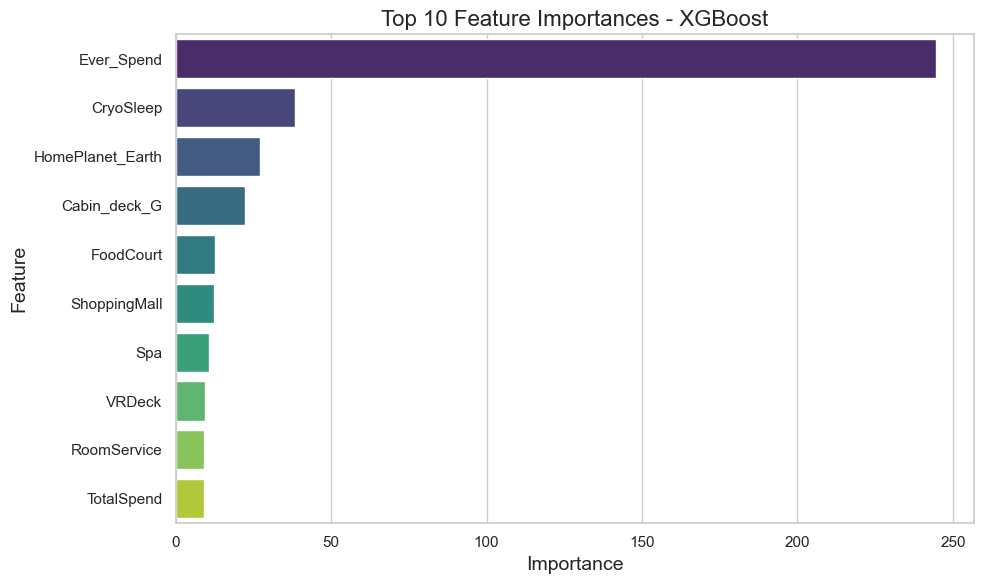

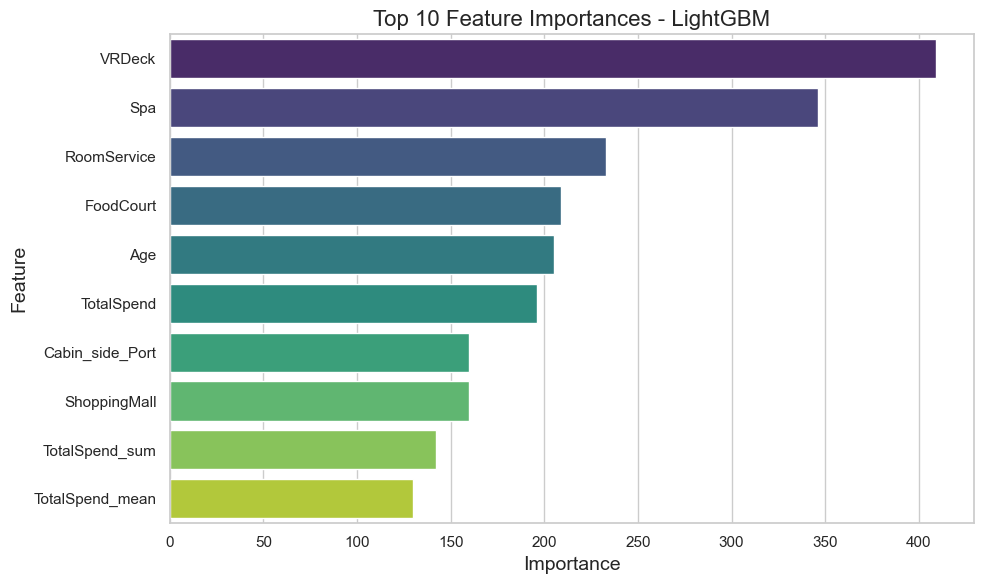

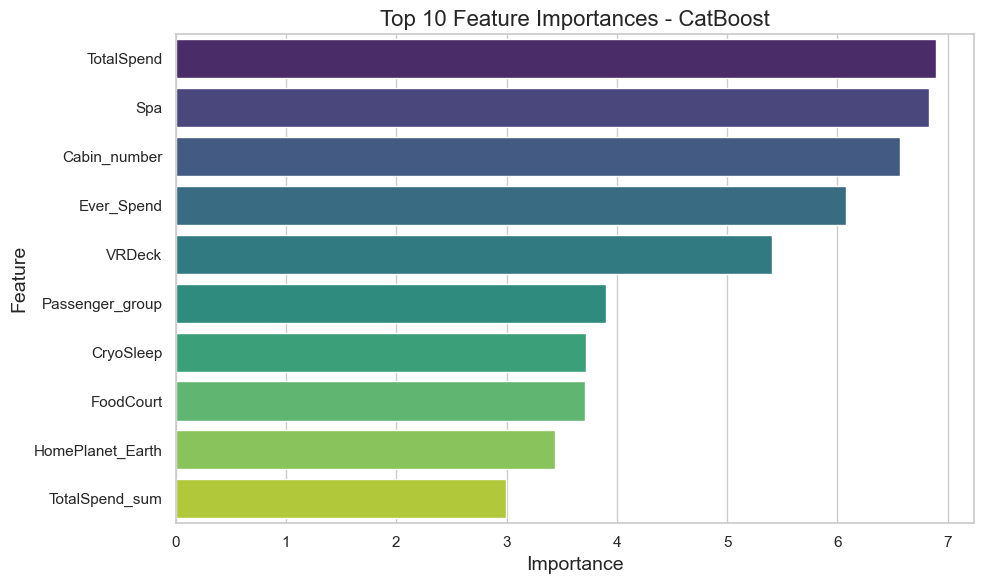

In [127]:
# Plot XGBoost Feature Importances
plot_feature_importances(xgb_importances_df, 'XGBoost', top_n=10)

# Plot LightGBM Feature Importances
plot_feature_importances(lgb_importances_df, 'LightGBM', top_n=10)

# Plot CatBoost Feature Importances
plot_feature_importances(cat_importances_df, 'CatBoost', top_n=10)

#### 4.2. SHAP Importance

In [129]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns

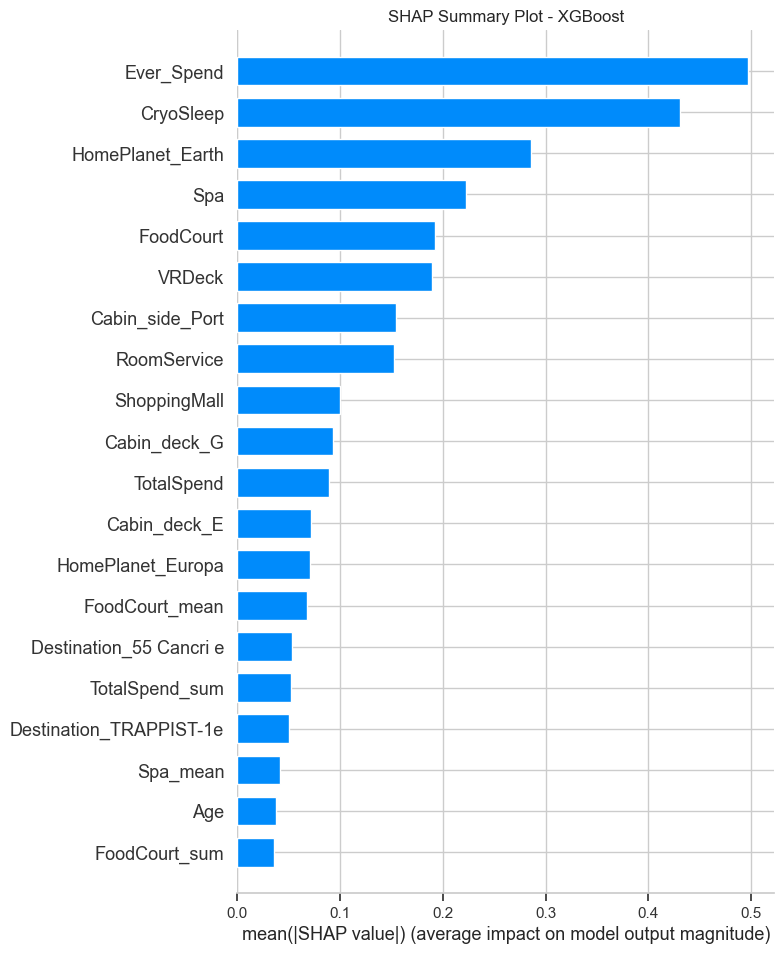

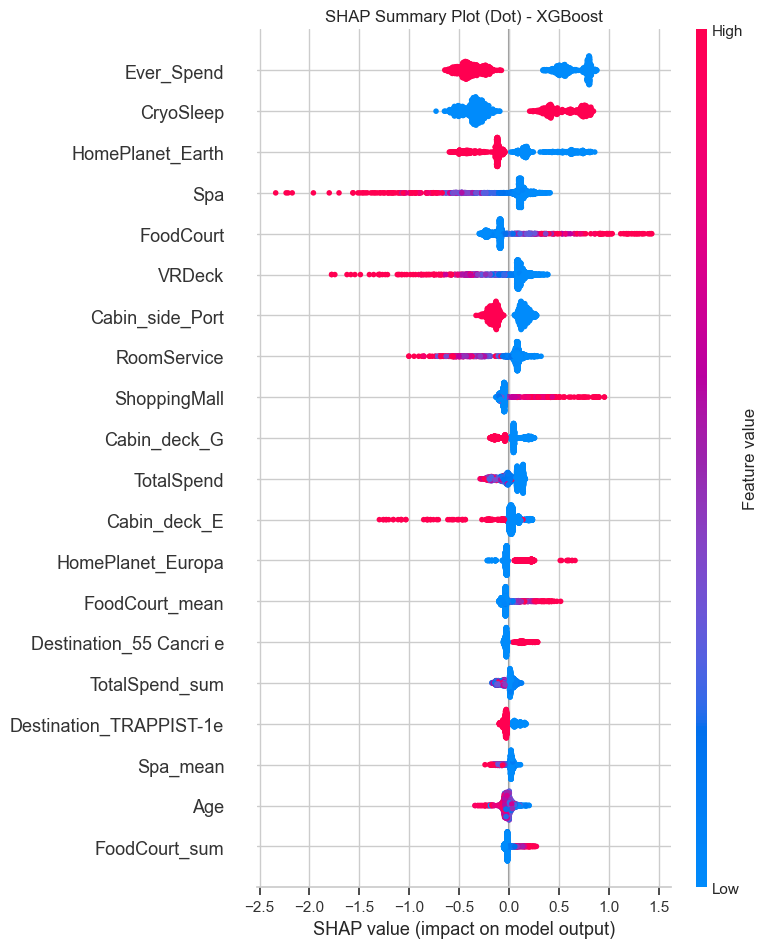

In [130]:
shap.initjs()

# Assuming `best_xgb` is your tuned XGBoost model
# and `X_test` is your test dataset

# 1. Create a SHAP Explainer
explainer_xgb = shap.TreeExplainer(best_xgb)

# 2. Calculate SHAP values for the test set
shap_values_xgb = explainer_xgb.shap_values(X_test_cat)

# 3. Visualize SHAP values

# 3.1. SHAP Summary Plot (Global Interpretation)
shap.summary_plot(shap_values_xgb, X_test_cat, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - XGBoost")
plt.show()

# 3.2. SHAP Summary Plot (Detailed)
shap.summary_plot(shap_values_xgb, X_test_cat, plot_type="dot", show=False)
plt.title("SHAP Summary Plot (Dot) - XGBoost")
plt.show()

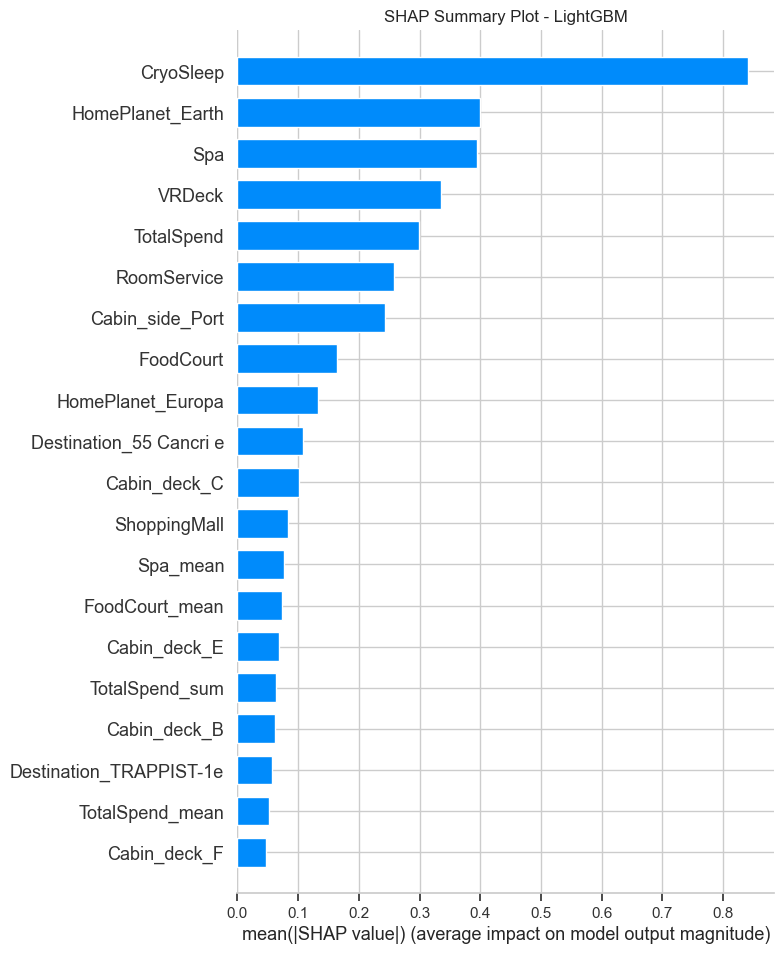

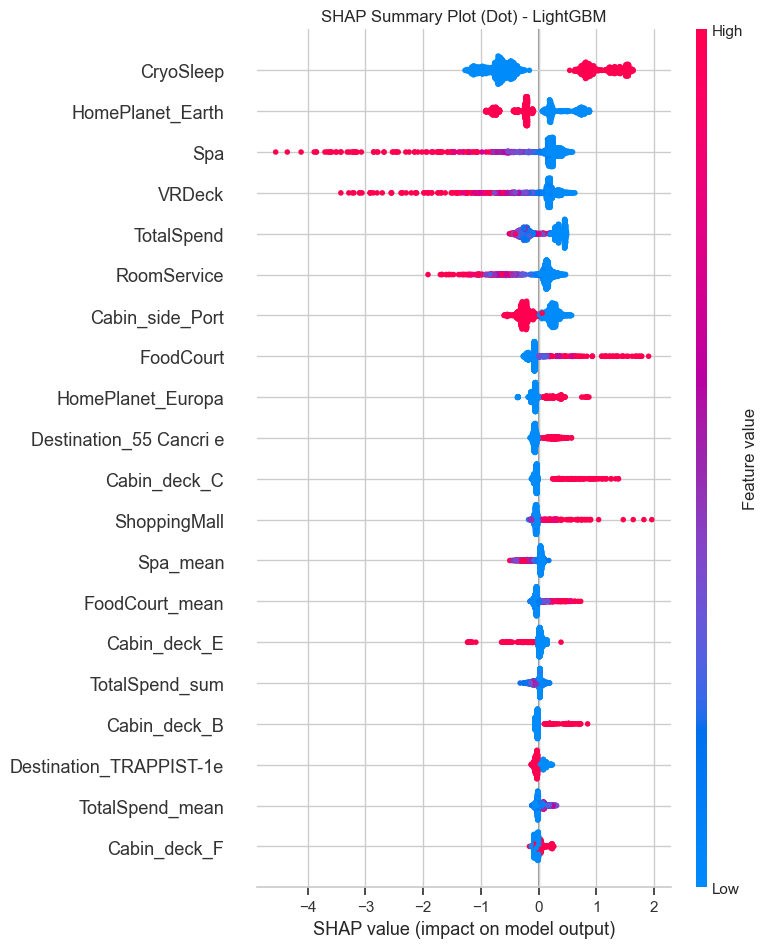

In [131]:
# Initialize SHAP JavaScript (for Jupyter Notebooks)
shap.initjs()

# Assuming `best_lgb` is your tuned LightGBM model
# and `X_test` is your test dataset

# 1. Create a SHAP Explainer
explainer_lgb = shap.TreeExplainer(best_lgb)

# 2. Calculate SHAP values for the test set
shap_values_lgb = explainer_lgb.shap_values(X_test_cat)

# 3. Visualize SHAP values

# 3.1. SHAP Summary Plot (Global Interpretation)
shap.summary_plot(shap_values_lgb, X_test_cat, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - LightGBM")
plt.show()

# 3.2. SHAP Summary Plot (Detailed)
shap.summary_plot(shap_values_lgb, X_test_cat, plot_type="dot", show=False)
plt.title("SHAP Summary Plot (Dot) - LightGBM")
plt.show()

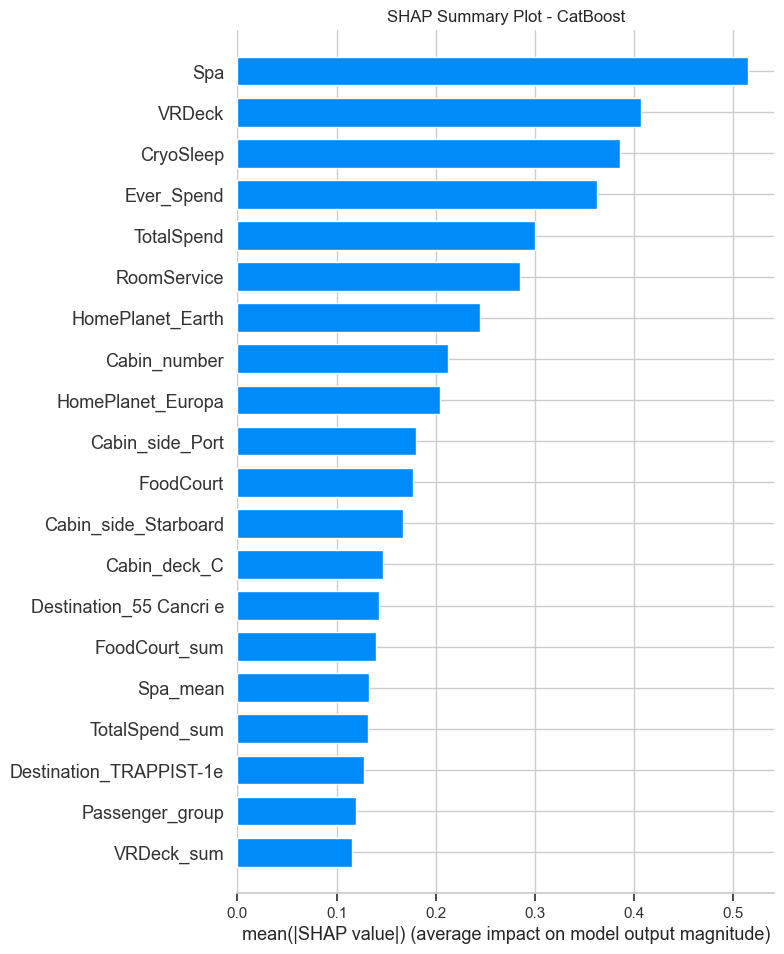

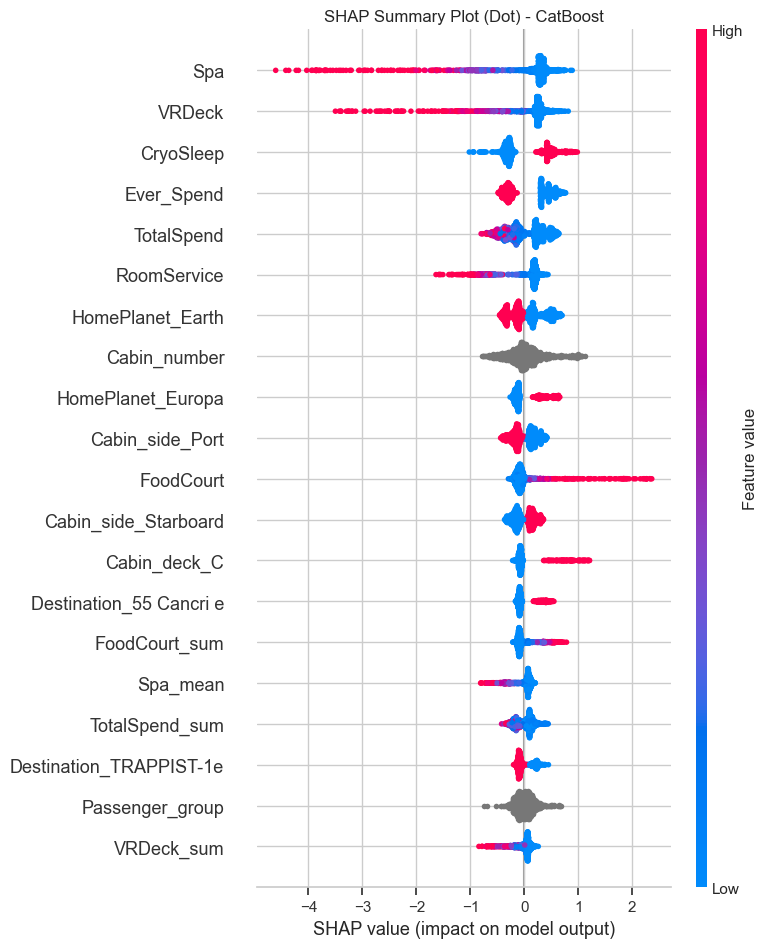

In [132]:
# Initialize SHAP JavaScript (for Jupyter Notebooks)
shap.initjs()

# Assuming `best_cat` is your tuned CatBoost model
# and `X_test` is your test dataset

# 1. Create a SHAP Explainer
explainer_cat = shap.TreeExplainer(best_cat)

# 2. Calculate SHAP values for the test set
shap_values_cat = explainer_cat.shap_values(X_test)

# 3. Visualize SHAP values

# 3.1. SHAP Summary Plot (Global Interpretation)
shap.summary_plot(shap_values_cat, X_test, plot_type="bar", show=False)
plt.title("SHAP Summary Plot - CatBoost")
plt.show()

# 3.2. SHAP Summary Plot (Detailed)
shap.summary_plot(shap_values_cat, X_test, plot_type="dot", show=False)
plt.title("SHAP Summary Plot (Dot) - CatBoost")
plt.show()

### 5. Random Forest Classifier

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, 
                               scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best parameters and accuracy for Random Forest
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
best_rf = rf_grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}
Random Forest Accuracy: 0.8048411497730711


### 6. Neural Network (Deep Learning)

In [136]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [137]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
# Function to create model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(32, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(16, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define parameter grid
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

best_accuracy = 0
best_params = {}

# Manual grid search
for optimizer in param_grid['optimizer']:
    for activation in param_grid['activation']:
        for batch_size in param_grid['batch_size']:
            for epochs in param_grid['epochs']:
                print(f"Training with optimizer={optimizer}, activation={activation}, batch_size={batch_size}, epochs={epochs}")
                
                # Create model
                model = create_model(optimizer=optimizer, activation=activation)
                
                # Train model
                model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                
                # Make predictions
                y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
                
                # Evaluate model
                accuracy = accuracy_score(y_test, y_pred)
                print(f"Accuracy: {accuracy:.4f}")
                
                # Update best parameters if accuracy improves
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'optimizer': optimizer,
                        'activation': activation,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }

print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {best_params}")

Training with optimizer=adam, activation=relu, batch_size=16, epochs=50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8026
Training with optimizer=adam, activation=relu, batch_size=16, epochs=100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8011
Training with optimizer=adam, activation=relu, batch_size=32, epochs=50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8033
Training with optimizer=adam, activation=relu, batch_size=32, epochs=100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7950
Training with optimizer=adam, activation=tanh, batch_size=16, epochs=50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7920
Training with optimizer=adam, activation=tanh, batch_size=16, epochs=100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7912
Training with optimizer=adam, activation=tanh, batch_size=32, epochs=50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8139
Training with optimizer=adam, activation=tanh, batch_size=32, epochs=100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0

In [139]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [140]:
def create_model(optimizer='adam', activation='relu', neurons1=32, neurons2=16, dropout_rate=0.0, reg_lambda=0.0):
    model = Sequential()
    model.add(Dense(neurons1, activation=activation, input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(reg_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation=activation, kernel_regularizer=l2(reg_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define parameter grid
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'neurons1': [32, 64],  # First hidden layer neurons
    'neurons2': [16, 32],  # Second hidden layer neurons
    'dropout_rate': [0.0, 0.2],  # Dropout rates
    'reg_lambda': [0.0, 0.01]  # L2 regularization
}

best_accuracy = 0
best_params = {}

# Manual grid search
for optimizer in param_grid['optimizer']:
    for activation in param_grid['activation']:
        for batch_size in param_grid['batch_size']:
            for epochs in param_grid['epochs']:
                for neurons1 in param_grid['neurons1']:
                    for neurons2 in param_grid['neurons2']:
                        for dropout_rate in param_grid['dropout_rate']:
                            for reg_lambda in param_grid['reg_lambda']:
                                print(f"Training with optimizer={optimizer}, activation={activation}, batch_size={batch_size}, "
                                      f"epochs={epochs}, neurons1={neurons1}, neurons2={neurons2}, "
                                      f"dropout_rate={dropout_rate}, reg_lambda={reg_lambda}")
                                
                                # Create model
                                model = create_model(optimizer=optimizer, activation=activation,
                                                     neurons1=neurons1, neurons2=neurons2,
                                                     dropout_rate=dropout_rate, reg_lambda=reg_lambda)
                                
                                # Train model
                                model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                                
                                # Make predictions
                                y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
                                
                                # Evaluate model
                                accuracy = accuracy_score(y_test, y_pred)
                                print(f"Accuracy: {accuracy:.4f}")
                                
                                # Update best parameters if accuracy improves
                                if accuracy > best_accuracy:
                                    best_accuracy = accuracy
                                    best_params = {
                                        'optimizer': optimizer,
                                        'activation': activation,
                                        'batch_size': batch_size,
                                        'epochs': epochs,
                                        'neurons1': neurons1,
                                        'neurons2': neurons2,
                                        'dropout_rate': dropout_rate,
                                        'reg_lambda': reg_lambda
                                    }

print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {best_params}")

Training with optimizer=adam, activation=relu, batch_size=16, epochs=50, neurons1=32, neurons2=16, dropout_rate=0.0, reg_lambda=0.0
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8200
Training with optimizer=adam, activation=relu, batch_size=16, epochs=50, neurons1=32, neurons2=16, dropout_rate=0.0, reg_lambda=0.01
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8139
Training with optimizer=adam, activation=relu, batch_size=16, epochs=50, neurons1=32, neurons2=16, dropout_rate=0.2, reg_lambda=0.0
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8245
Training with optimizer=adam, activation=relu, batch_size=16, epochs=50, neurons1=32, neurons2=16, dropout_rate=0.2, reg_lambda=0.01
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8268
Training with optimizer=adam, activation=relu, batch_size=16, epochs=50, neurons1=32, neurons2=32, dropout_rate=0.0, reg_lambda=0.0
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8079
Training with optimizer=adam, activation=relu, batch_size=

In [141]:
def create_model(optimizer='adam', activation='relu', neurons1=32, neurons2=16, dropout_rate=0.0, reg_lambda=0.0):
    model = Sequential()
    model.add(Dense(neurons1, activation=activation, input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(reg_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, activation=activation, kernel_regularizer=l2(reg_lambda)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define parameter grid
param_grid = {
    'optimizer': ['adam'],
    'activation': ['tanh'],
    'batch_size': [16,32],
    'epochs': [50,100],
    'neurons1': [64],  # First hidden layer neurons
    'neurons2': [32],  # Second hidden layer neurons
    'dropout_rate': [0.2],  # Dropout rates
    'reg_lambda': [0.0, 0.01]  # L2 regularization
}

best_accuracy = 0
best_params = {}

# Manual grid search
for optimizer in param_grid['optimizer']:
    for activation in param_grid['activation']:
        for batch_size in param_grid['batch_size']:
            for epochs in param_grid['epochs']:
                for neurons1 in param_grid['neurons1']:
                    for neurons2 in param_grid['neurons2']:
                        for dropout_rate in param_grid['dropout_rate']:
                            for reg_lambda in param_grid['reg_lambda']:
                                print(f"Training with optimizer={optimizer}, activation={activation}, batch_size={batch_size}, "
                                      f"epochs={epochs}, neurons1={neurons1}, neurons2={neurons2}, "
                                      f"dropout_rate={dropout_rate}, reg_lambda={reg_lambda}")
                                
                                # Create model
                                model = create_model(optimizer=optimizer, activation=activation,
                                                     neurons1=neurons1, neurons2=neurons2,
                                                     dropout_rate=dropout_rate, reg_lambda=reg_lambda)
                                
                                # Train model
                                model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
                                
                                # Make predictions
                                y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
                                
                                # Evaluate model
                                accuracy = accuracy_score(y_test, y_pred)
                                print(f"Accuracy: {accuracy:.4f}")
                                
                                # Update best parameters if accuracy improves
                                if accuracy > best_accuracy:
                                    best_accuracy = accuracy
                                    best_params = {
                                        'optimizer': optimizer,
                                        'activation': activation,
                                        'batch_size': batch_size,
                                        'epochs': epochs,
                                        'neurons1': neurons1,
                                        'neurons2': neurons2,
                                        'dropout_rate': dropout_rate,
                                        'reg_lambda': reg_lambda
                                    }

print(f"Best Accuracy: {best_accuracy:.6f}")
print(f"Best Parameters: {best_params}")

Training with optimizer=adam, activation=tanh, batch_size=16, epochs=50, neurons1=64, neurons2=32, dropout_rate=0.2, reg_lambda=0.0
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8207
Training with optimizer=adam, activation=tanh, batch_size=16, epochs=50, neurons1=64, neurons2=32, dropout_rate=0.2, reg_lambda=0.01
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7927
Training with optimizer=adam, activation=tanh, batch_size=16, epochs=100, neurons1=64, neurons2=32, dropout_rate=0.2, reg_lambda=0.0
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8169
Training with optimizer=adam, activation=tanh, batch_size=16, epochs=100, neurons1=64, neurons2=32, dropout_rate=0.2, reg_lambda=0.01
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.7988
Training with optimizer=adam, activation=tanh, batch_size=32, epochs=50, neurons1=64, neurons2=32, dropout_rate=0.2, reg_lambda=0.0
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8275
Training with optimizer=adam, activation=tanh, batch_siz

In [ ]:
# Test dataset

In [252]:
test_df = pd.read_csv("space_ship\\test.csv")

test_df.info()
test_df = process_passenger_data(test_df)
test_df.head()

test_df['Age_Group'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)
test_df['Age_Group'].value_counts()

test = test_df.drop(columns=['Name'])
test['Ever_Spend'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
# test['CryoSleep'] = test['CryoSleep'].astype(int)
# test['VIP'] = test['VIP'].astype(int)

In [254]:
columns_to_group = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend']
grouped_sum_test = test.groupby('Passenger_group')[columns_to_group].sum().reset_index()
grouped_mean_test = test.groupby('Passenger_group')[columns_to_group].mean().reset_index()

# Rename the columns for clarity
grouped_sum_test.columns = ['Passenger_group'] + [f'{col}_sum' for col in columns_to_group]
grouped_mean_test.columns = ['Passenger_group'] + [f'{col}_mean' for col in columns_to_group]

# Merge the sum and mean DataFrames
test = pd.merge(test, grouped_mean_test, on='Passenger_group').merge(grouped_sum_test, on='Passenger_group')

test['Passenger_num_in_group'] = test['Passenger_num_in_group'].astype(int)

# One-hot encode categorical features
test_encoded = pd.get_dummies(test, columns=['HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side','Age_Group'])
bool_columns = test_encoded.select_dtypes(include='bool').columns
test_encoded[bool_columns] = test_encoded[bool_columns].astype(int)

test_encoded.head()
test_encoded.columns = sanitized_features

In [258]:
test_withID=test_encoded.copy()
test_withID['Passenger_num_in_group'] = test_withID['Passenger_num_in_group'].astype(str).str.zfill(2)
test_withID['PassengerId'] = test_withID['Passenger_group']+'_'+test_withID['Passenger_num_in_group']

### Catboost

In [200]:
# 1.
# Initialize the CatBoost classifier with the best parameters
catboost_clf_best = CatBoostClassifier(
    depth=6,
    iterations=484,
    learning_rate=0.049443786892440195,
    eval_metric='Logloss',
    random_seed=42,
    verbose=0  # Suppress detailed logging; set to True if you want to see more output
)

# {'depth': 6, 'iterations': 484, 'learning_rate': 0.049443786892440195}

# Fit the model to your training data
catboost_clf_best.fit(X_train, y_train)

# Predicting on the test set
predictions = catboost_clf_best.predict(test_encoded)

In [204]:
submission = pd.DataFrame({
    'PassengerId': test_withID['PassengerId'],  # Replace with your actual ID column
    'Transported': predictions  # Replace with your predicted values
})


In [208]:
submission.to_csv('submission.csv', index=False)

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(features.shape[1],)))  # First hidden layer
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(32, activation='tanh'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (adjust activation based on your task)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adjust loss based on your task

In [300]:
X_train_cat = X_train.copy()
test_encoded_cat = test_encoded.copy()

# Convert 'Passenger_group' and 'Cabin_number' to 'category' dtype
X_train_cat[['Passenger_group', 'Cabin_number']] = X_train_cat[['Passenger_group', 'Cabin_number']].astype('category')
test_encoded_cat[['Passenger_group', 'Cabin_number']] = test_encoded_cat[['Passenger_group', 'Cabin_number']].astype('category')

In [302]:
# Assuming 'test_encoded' is your test dataset
# Fill NaN values in boolean columns with False
test_encoded_cat['CryoSleep'] = test_encoded_cat['CryoSleep'].fillna(False).astype(int)
test_encoded_cat['VIP'] = test_encoded_cat['VIP'].fillna(False).astype(int)

In [304]:
# Create the LightGBM dataset
lgb_train = lgb.Dataset(X_train_cat, label=y_train)

# Set the parameters for the model
params = {
    'learning_rate': 0.0305,
    'n_estimators': 162,
    'num_leaves': 26,
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1
}

# Train the model
model = lgb.train(params, lgb_train, num_boost_round=params['n_estimators'])

In [316]:
# Align the test set
test_aligned = test_encoded_cat.reindex(columns=X_train.columns, fill_value=0)

# Generate predictions on the test set
y_pred_prob = model.predict(test_aligned)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred_prob > 0.5).astype(int)
y_pred_boolean = y_pred_binary.astype(bool)

In [318]:
# Prepare submission DataFrame
submission_df = pd.DataFrame({
    'PassengerId': test_withID['PassengerId'],  # Replace with actual ID column
    'Transported': y_pred_boolean.flatten()
})

# Save the predictions to CSV for submission
submission_df.to_csv('kaggle_submission_lgbm.csv', index=False)

### Deep learning

In [246]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_encoded_scaled = scaler.transform(test_encoded)

In [262]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the model using best parameters
def create_model(optimizer='adam', activation='tanh', neurons1=64, neurons2=32, dropout_rate=0.2, reg_lambda=0.0):
    model = Sequential()
    
    # First hidden layer
    model.add(Dense(neurons1, input_dim=X_train.shape[1], activation=activation, kernel_regularizer=l2(reg_lambda)))
    model.add(Dropout(dropout_rate))
    
    # Second hidden layer
    model.add(Dense(neurons2, activation=activation, kernel_regularizer=l2(reg_lambda)))
    model.add(Dropout(dropout_rate))
    
    # Output layer (binary classification)
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
# Create the model with the best parameters
model = create_model(optimizer='adam', activation='tanh', neurons1=64, neurons2=32, dropout_rate=0.2, reg_lambda=0.0)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

In [268]:
# Align the test set before scaling (use reindex on the DataFrame)
test_aligned = test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Standardize the aligned test set
test_final_scaled = scaler.transform(test_aligned)

# Generate predictions on the scaled test set (make sure model is trained already)
y_pred_prob = model.predict(test_final_scaled)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Assuming you have a 'PassengerId' column or similar in your test data
submission_df = pd.DataFrame({
    'PassengerId': test_withID['PassengerId'],  # Replace with your actual ID column
    'Transported': predictions  # Replace with your predicted values
})

# Save the predictions to CSV for submission
submission_df.to_csv('DL_submission.csv', index=False)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [270]:
# Create the model with the best parameters
model = create_model(optimizer='sgd', activation='tanh', neurons1=64, neurons2=32, dropout_rate=0.2, reg_lambda=0.0)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5555 - loss: 0.7323
Epoch 2/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5650 - loss: 0.7015
Epoch 3/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5613 - loss: 0.7024
Epoch 4/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5954 - loss: 0.6783
Epoch 5/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5632 - loss: 0.6975
Epoch 6/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5844 - loss: 0.6777
Epoch 7/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6263 - loss: 0.6531
Epoch 8/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6315 - loss: 0.6526
Epoch 9/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6498 - loss: 0.6362
Epoch 10/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6372 - loss: 0.6400
Epoch 11/100
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6066 - loss: 0.6633
Epoch 12/100
166/166 ━━━━━━━━━━━━━━━━━━━━

In [272]:
# Align the test set before scaling (use reindex on the DataFrame)
test_aligned = test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Standardize the aligned test set
test_final_scaled = scaler.transform(test_aligned)

# Generate predictions on the scaled test set (make sure model is trained already)
y_pred_prob = model.predict(test_final_scaled)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Assuming you have a 'PassengerId' column or similar in your test data
submission_df = pd.DataFrame({
    'PassengerId': test_withID['PassengerId'],  # Replace with your actual ID column
    'Transported': predictions  # Replace with your predicted values
})

# Save the predictions to CSV for submission
submission_df.to_csv('DL_submission2.csv', index=False)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
